load all the library that is needed

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

load the dataset

In [4]:
data = pd.read_csv('C:/Users/35207/Desktop/数据挖掘/小组/data.csv')
print('数据集: ', data.shape)

数据集:  (236378, 22)


preview the data

In [6]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [7]:
data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
236373,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0
236377,0.0,0,1.0,1,32.0,0.0,0.0,0.0,1,0,...,1,0.0,1.0,2.0,2.0,0.0,0,6,6.0,6.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [9]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [10]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
warnings.simplefilter("ignore")
graph_by_variables = data.columns
print(graph_by_variables.to_list())

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


The distribution of all the variables

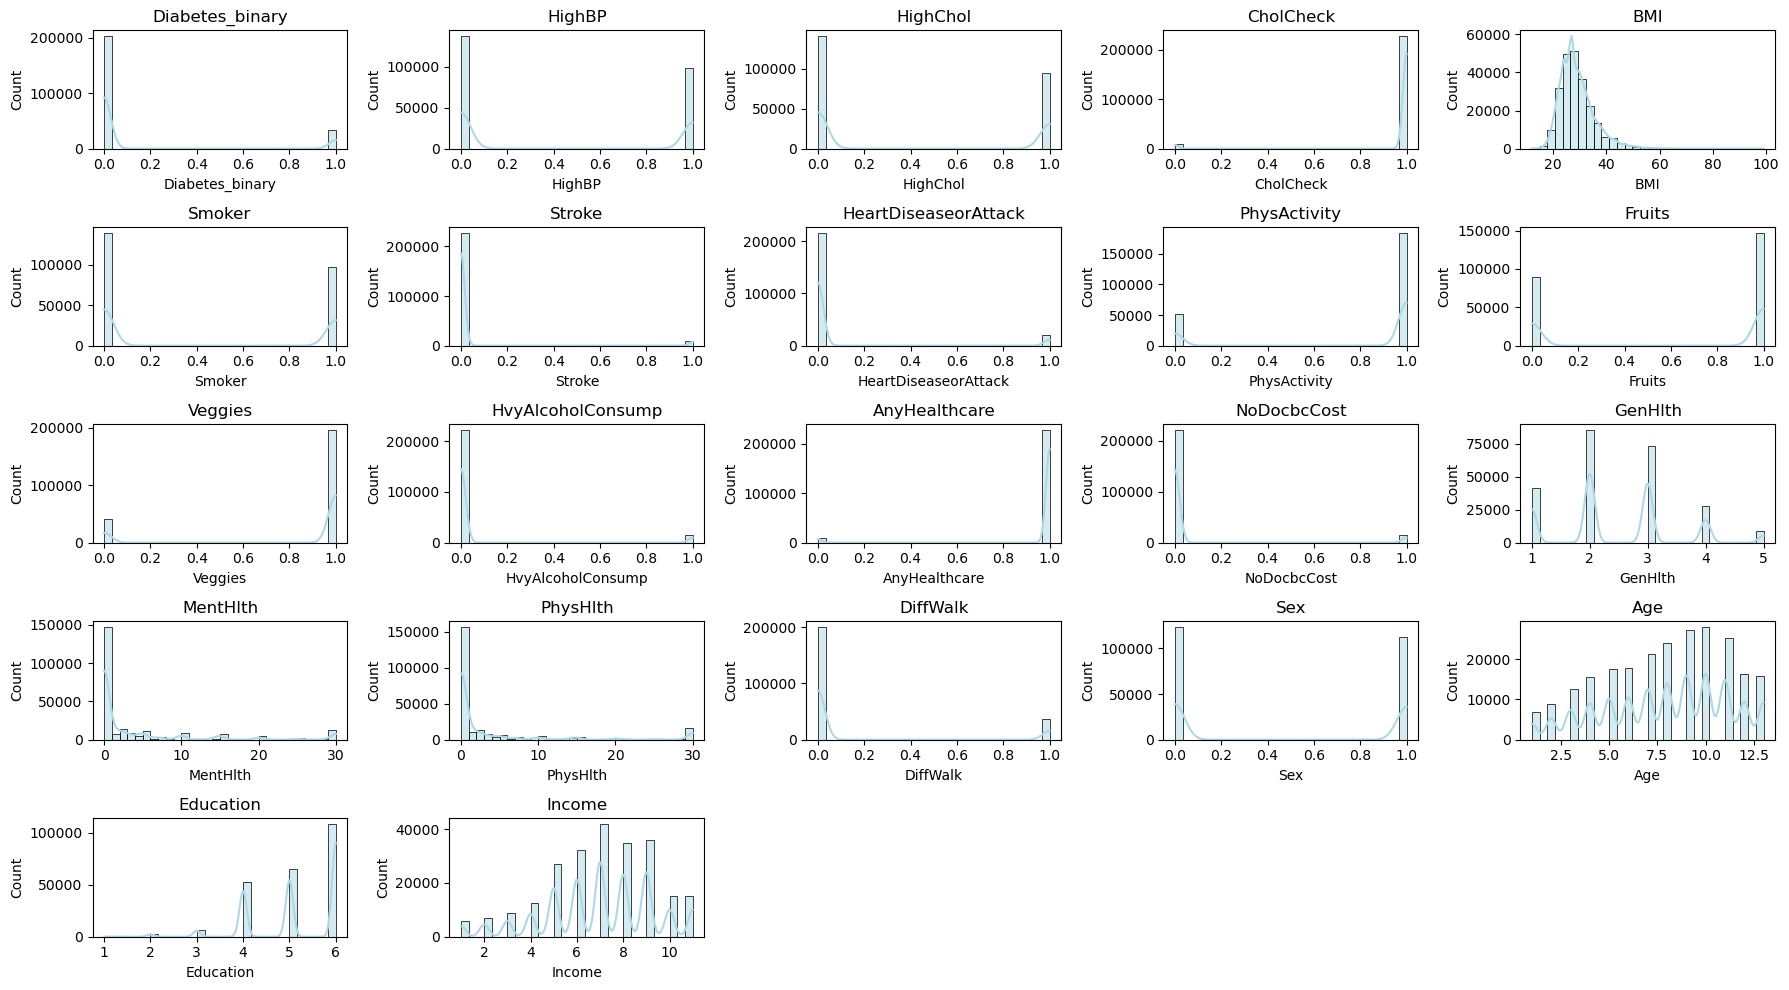

In [13]:
graph_by_variables_s = graph_by_variables[0:23]

plt.figure(figsize=(18, 10))
rows = 5
cols = 5
for i in range(0, len(graph_by_variables_s)):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data[graph_by_variables_s[i]], kde=True, color="lightblue", bins=30)  # 使用histplot替代distplot
    plt.title(graph_by_variables_s[i])
plt.tight_layout()
plt.show()

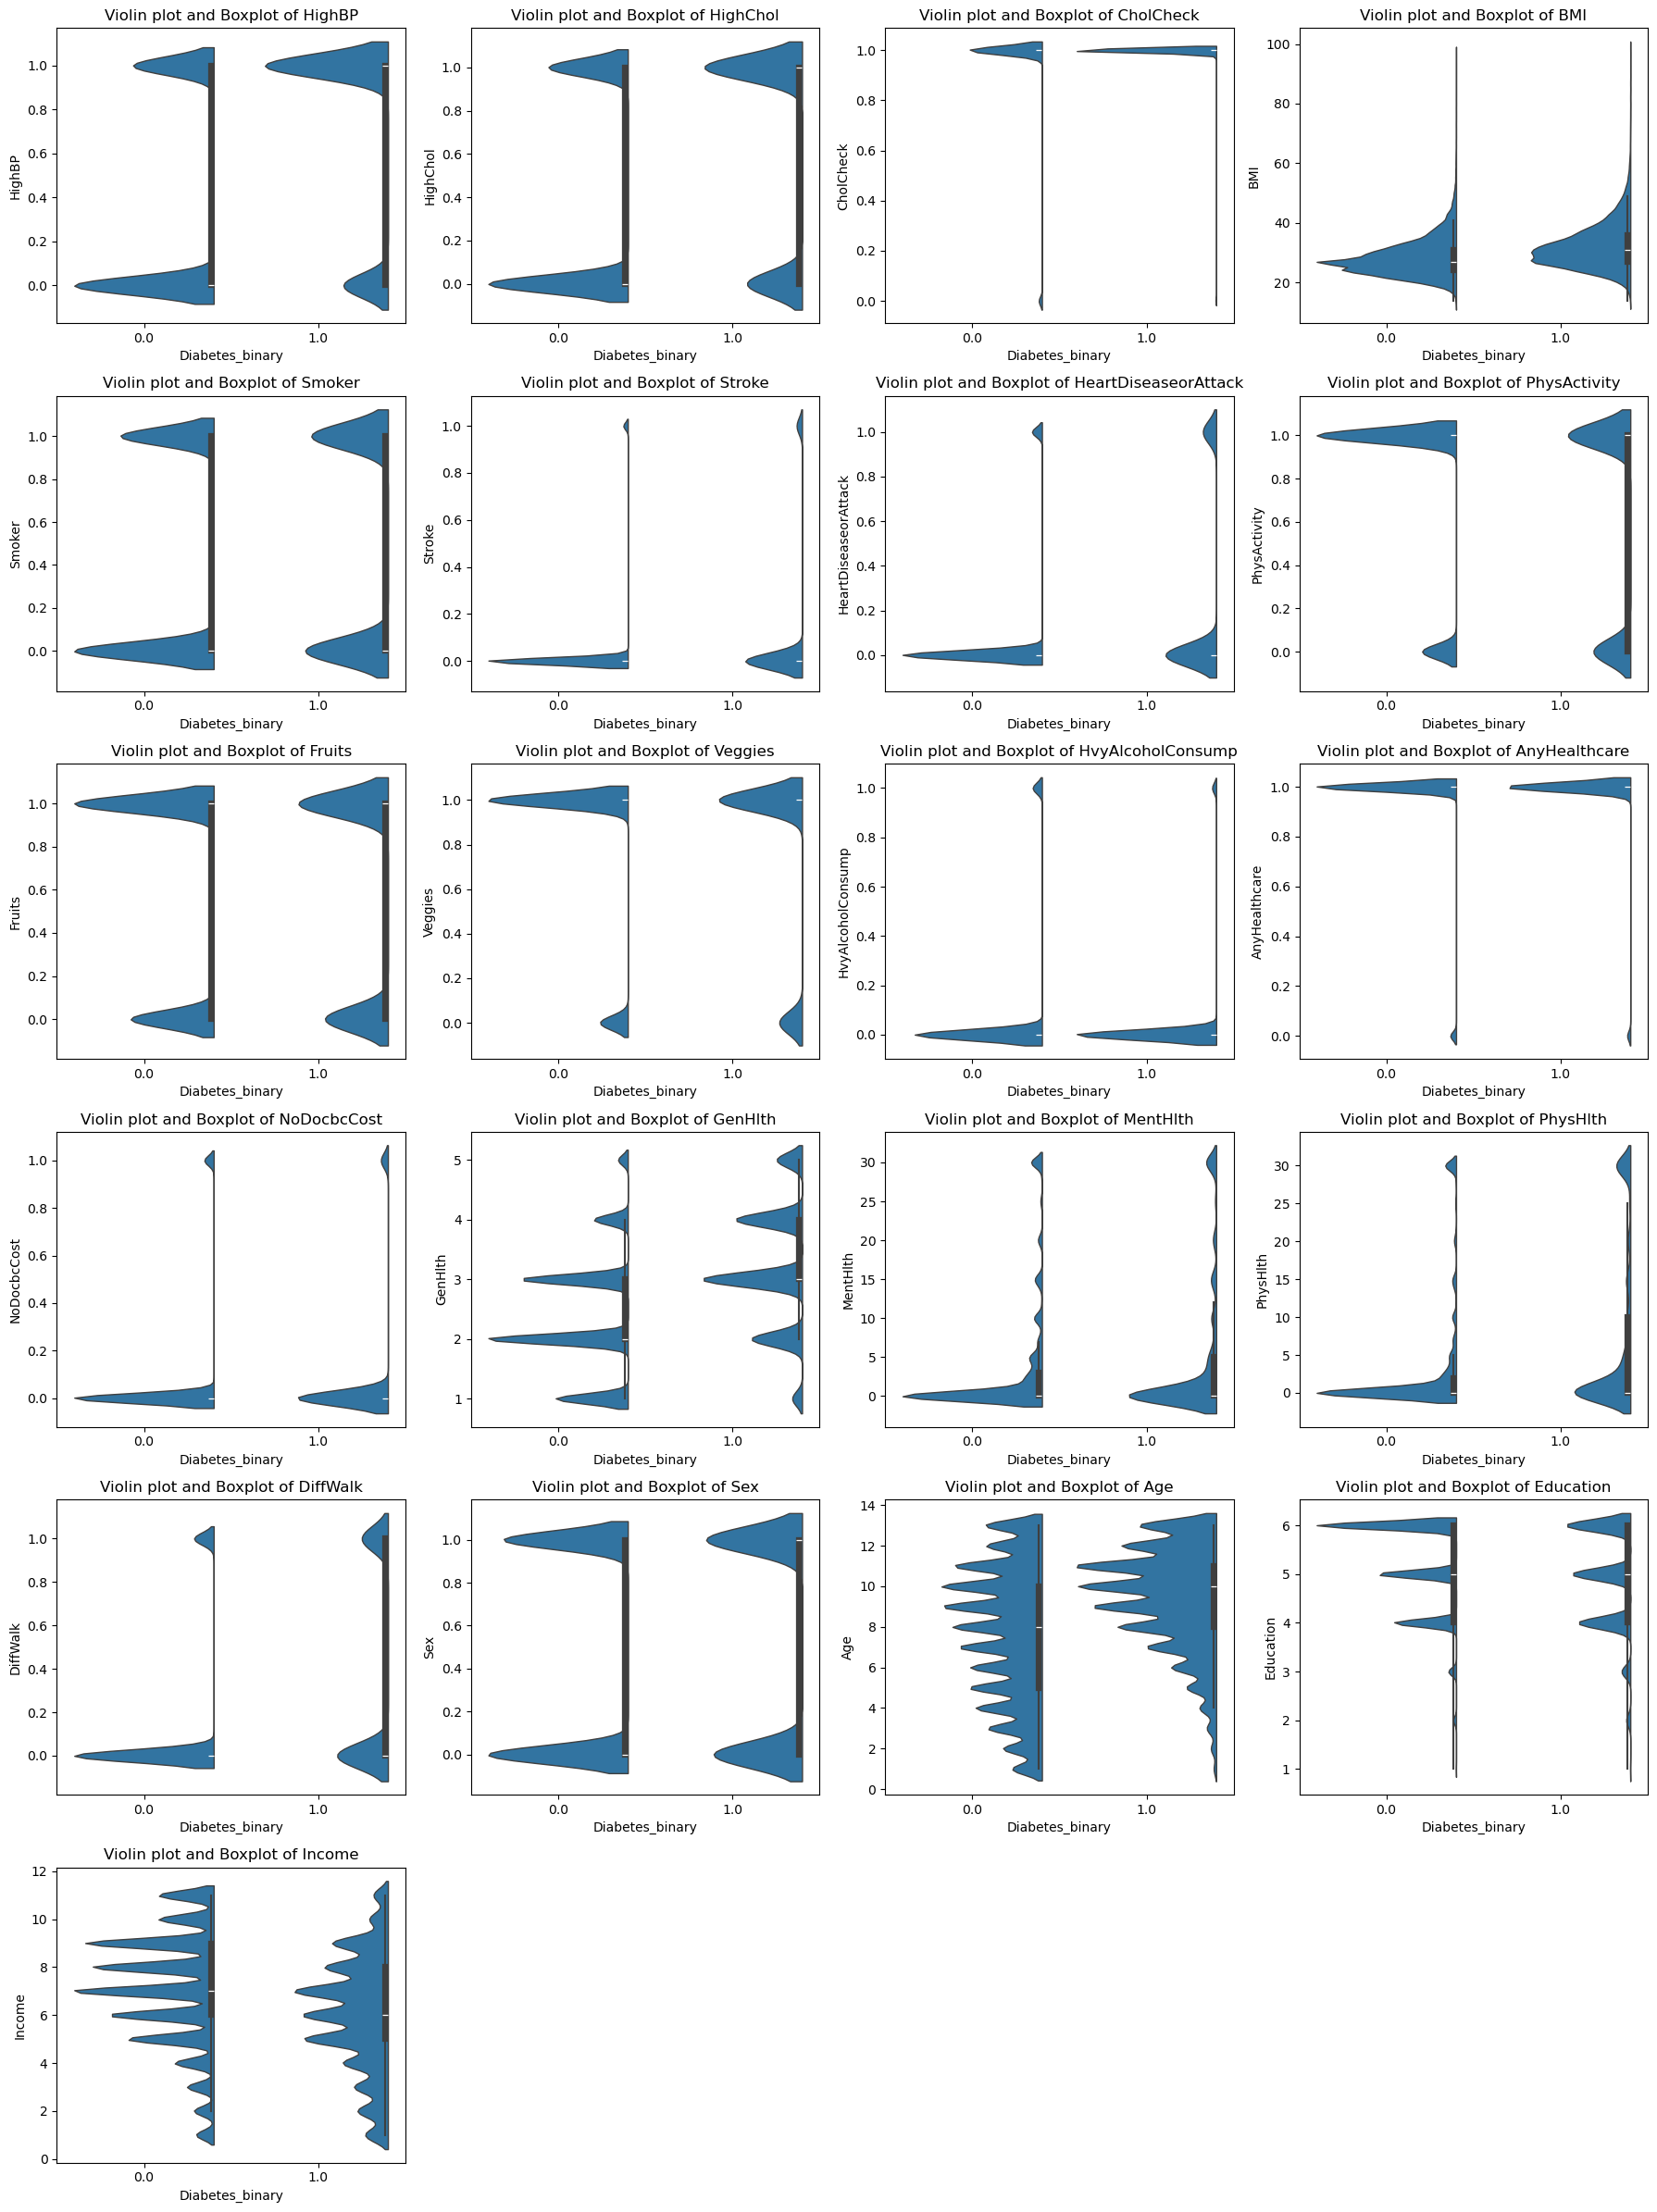

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
Data = pd.read_csv("C:/Users/35207/Desktop/数据挖掘/小组/data.csv")

# 定义变量子集
graph_by_variables = Data.columns  # 获取所有列名
graph_by_variables_s = graph_by_variables[1:23]  # 提取第1到22列

# 创建子图布局
num_vars = len(graph_by_variables_s)
num_cols = 4  # 每行显示4个图
num_rows = (num_vars + num_cols - 1) // num_cols  # 计算需要的行数

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()  # 将子图轴展平成1D列表以便迭代

for i, col in enumerate(graph_by_variables_s):
    if col in Data.select_dtypes(exclude=["object", "category"]).columns:  # 检查是否为数值型变量
        sns.violinplot(ax=axes[i], x="Diabetes_binary", y=col, data=Data, split=True, inner="box", linewidth=1)
        axes[i].set_title(f"Violin plot and Boxplot of {col}")
    else:
        axes[i].axis('off')  # 对非数值列关闭子图

# 删除多余的子图
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

standardize the numerical variables

In [16]:
scaler = StandardScaler()
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

drop the unnecessary variables

In [18]:
data_s = data.drop(['Diabetes_binary'], axis = 1)
data_s.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1,-2.129654,1.0,0.0,0.0,0,1,1,...,1,0.0,2.447970,0.768693,1.970522,0.0,0,0.968823,-1.203889,-0.811406
1,1,0.0,1,-0.145539,0.0,0.0,1.0,0,1,0,...,1,0.0,-0.467110,-0.499298,-0.454929,0.0,0,0.968823,-1.203889,-1.653354
2,1,1.0,1,0.617582,0.0,0.0,0.0,1,1,1,...,1,0.0,-0.467110,0.768693,-0.454929,0.0,0,0.350965,-1.203889,0.030541
3,0,1.0,1,0.007085,0.0,1.0,1.0,1,1,1,...,1,0.0,2.447970,-0.499298,3.183247,1.0,1,1.277752,-2.260766,-1.232380
4,0,0.0,1,-0.756036,1.0,0.0,0.0,0,0,0,...,1,0.0,0.504583,-0.499298,-0.454929,1.0,1,1.586681,-0.147011,-0.390433


see the correlation between each variable

<Axes: >

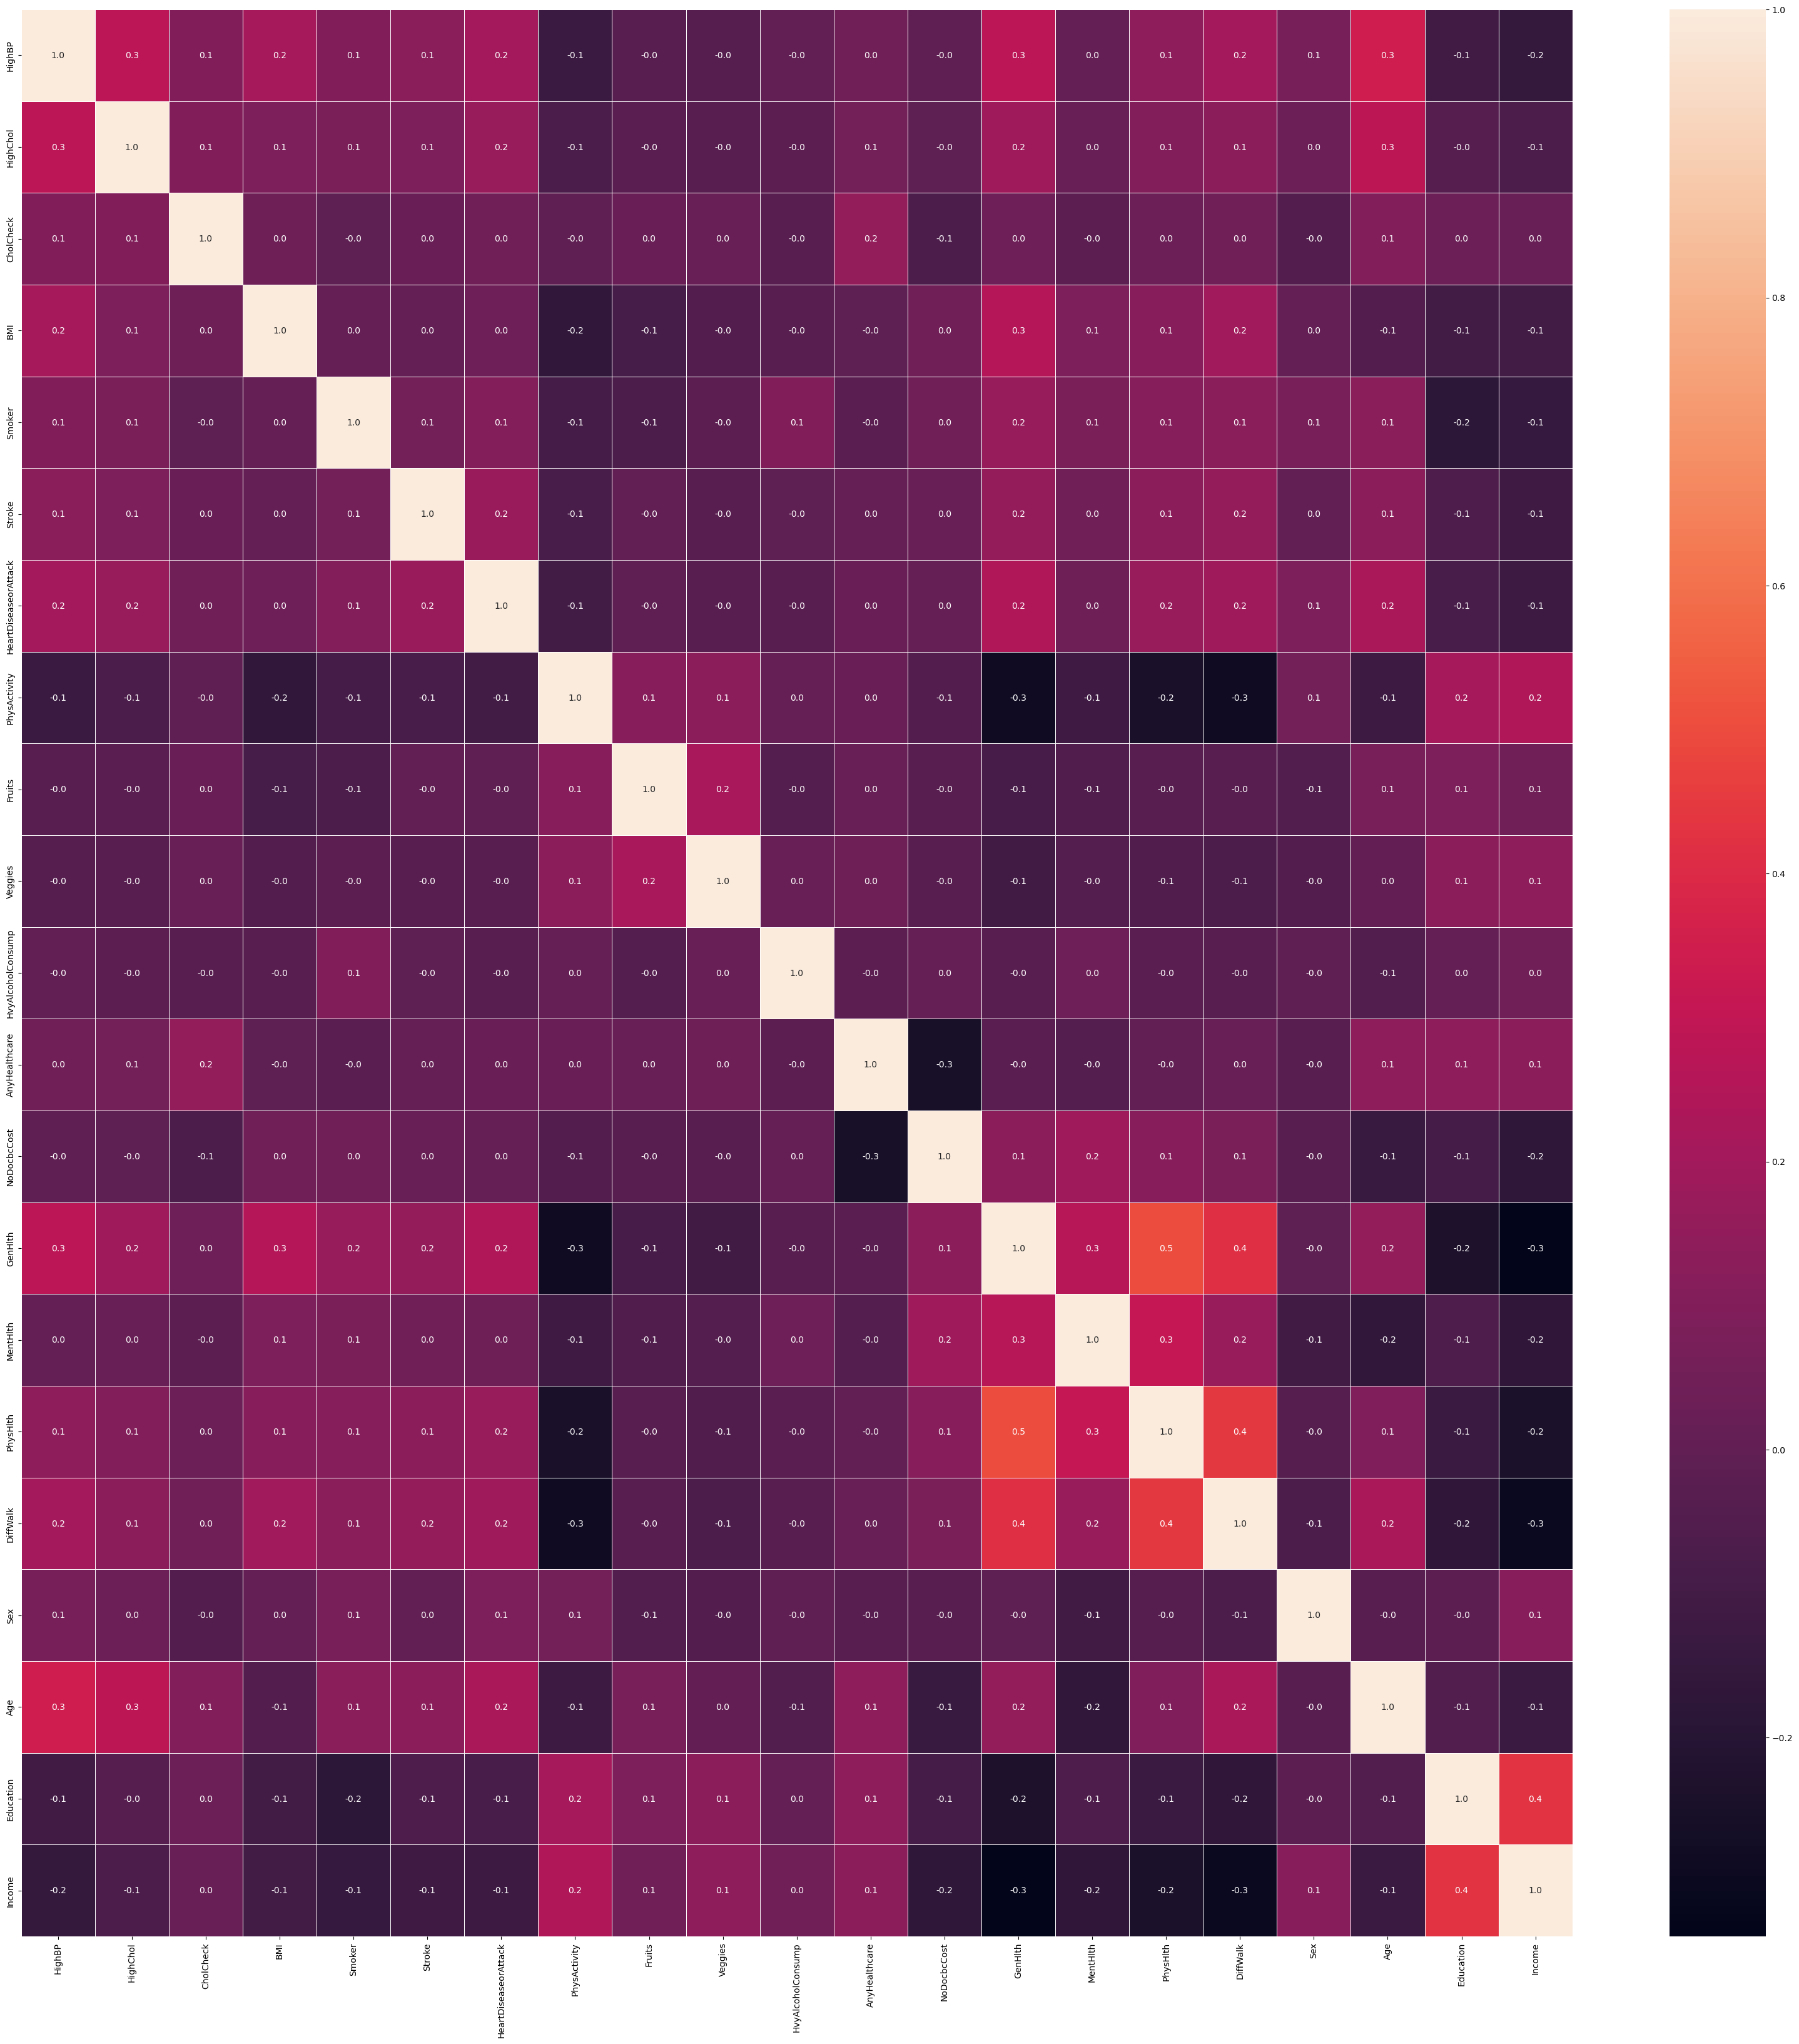

In [20]:
f, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(data_s.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)

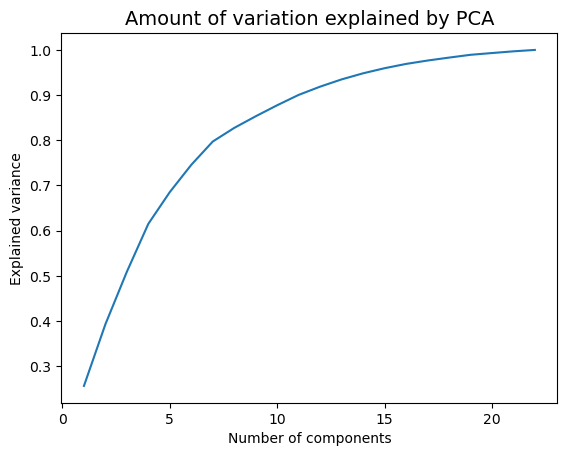

Number of components explaining 80% of variance: 8
Number of components explaining 90% of variance: 11
Number of components explaining 99% of variance: 20


In [21]:
pca = PCA()
pca.fit_transform(data)
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize = 14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0] + 1)
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0] + 1)
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0] + 1)

In [22]:
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(data.drop(['Diabetes_binary'], axis=1))
y = data['Diabetes_binary']

split the training set and the testing set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)